## Introduction

The objective of the assignment was to determine the best neighborhood in Pittsburgh. Multiple variables could be analyzed, but we decided to focus on environmental factors. The neighborhood with the highest environmental rating will be determined as the best neighborhood in Pittsburgh.

**Metric: Trees**
* Database Link: https://data.wprdc.org/dataset/city-trees
    * Description: Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. This does not account for the total trees in Pittsburgh, just those managed by the city.

**Metric: Playing Fields**
* Database Link: https://data.wprdc.org/dataset/playing-fields/resource/6af89346-b971-41d5-af09-49cfdb4dfe23
    * Description: Playing fields in the city of Pittsburgh.
    
**Metric: Playgrounds**
* Database Link: https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367
    * Description: Playgrounds in the city of Pittsburgh.

### Combined Data Analysis

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

To account for the great difference in numbers versus the ammount of trees compared to the playgrounds and fields, the total ammount of trees for each neighborhood was divided by 40. This allows for a fair comparison between all the neighborhoods.

In [17]:
data = pd.read_csv("Merged Data Sheet.csv")
newData = data.set_index('neighborhood')

azData = newData[['total']].sort_values(by='neighborhood', ascending=True)
sortedData = newData[['total']].sort_values(by='total', ascending=False)
# azData
# sortedData

In [18]:
azData.head()

,total
neighborhood,
Allegheny Center,27
Allegheny West,9
Allentown,4
Arlington,3
Arlington Heights,0


Here you can see that we have summed all the data for each neighborhood to a total ammount.

Text(0, 0.5, 'Metric')

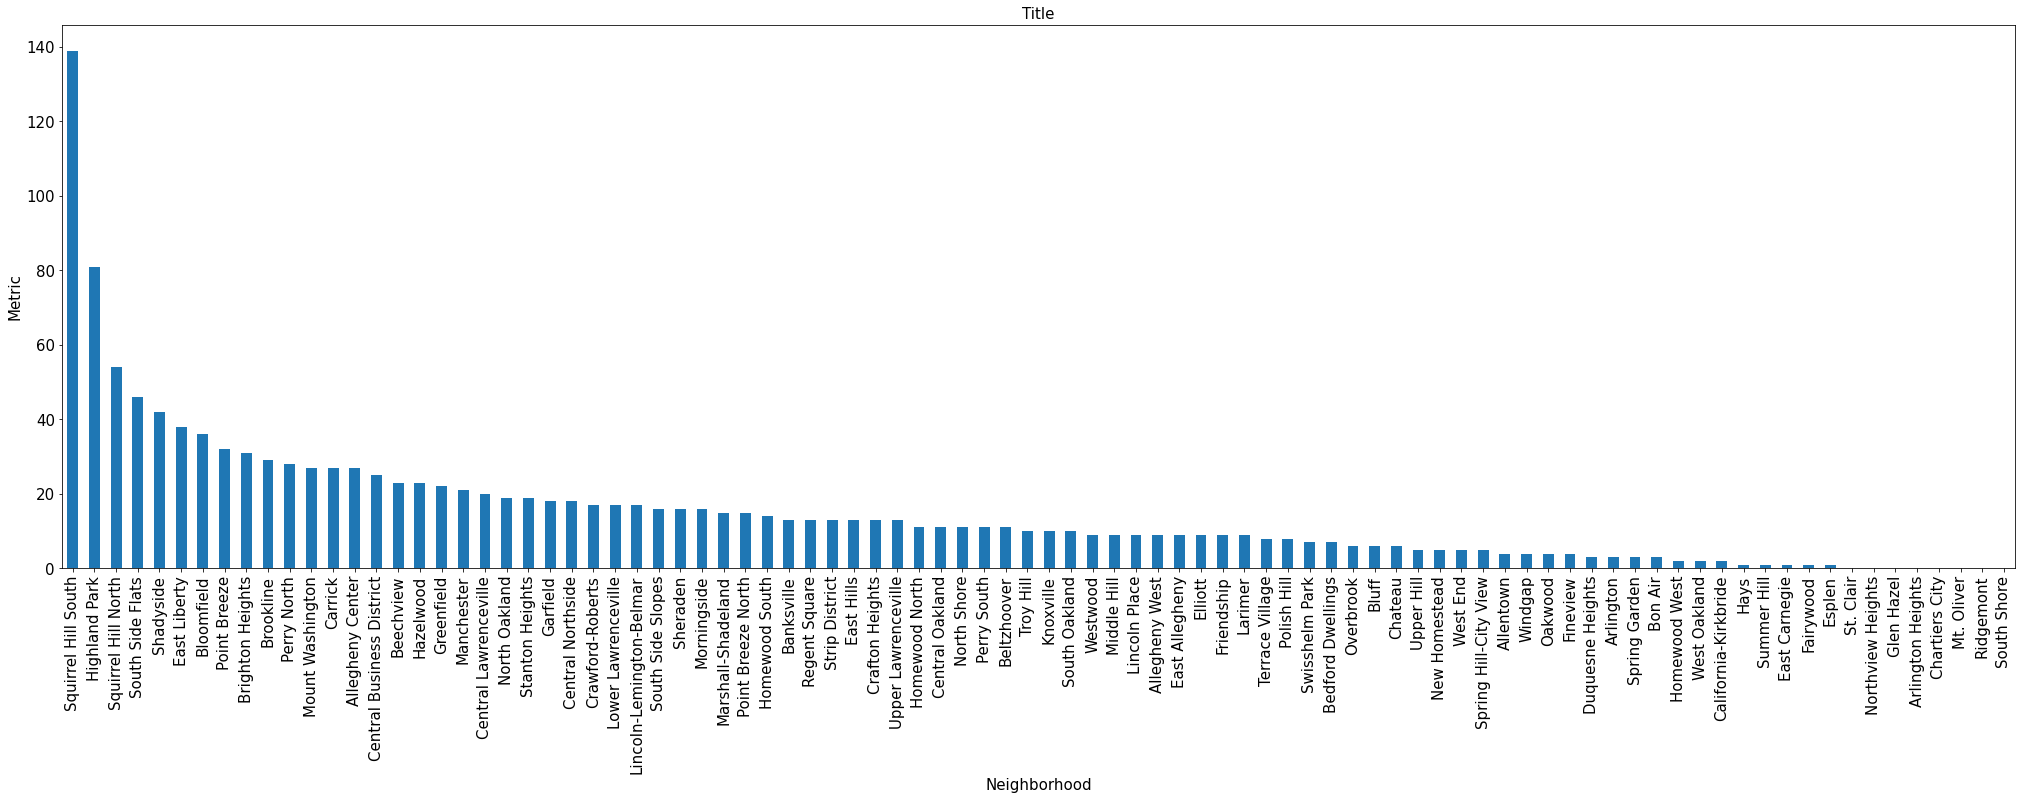

In [19]:
ax = sortedData.plot(kind='bar', figsize=(35,10),legend=False, fontsize=15)
ax.set_title("Title", fontsize=15)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_ylabel('Metric', fontsize = 15)

Text(0, 0.5, 'Metric')

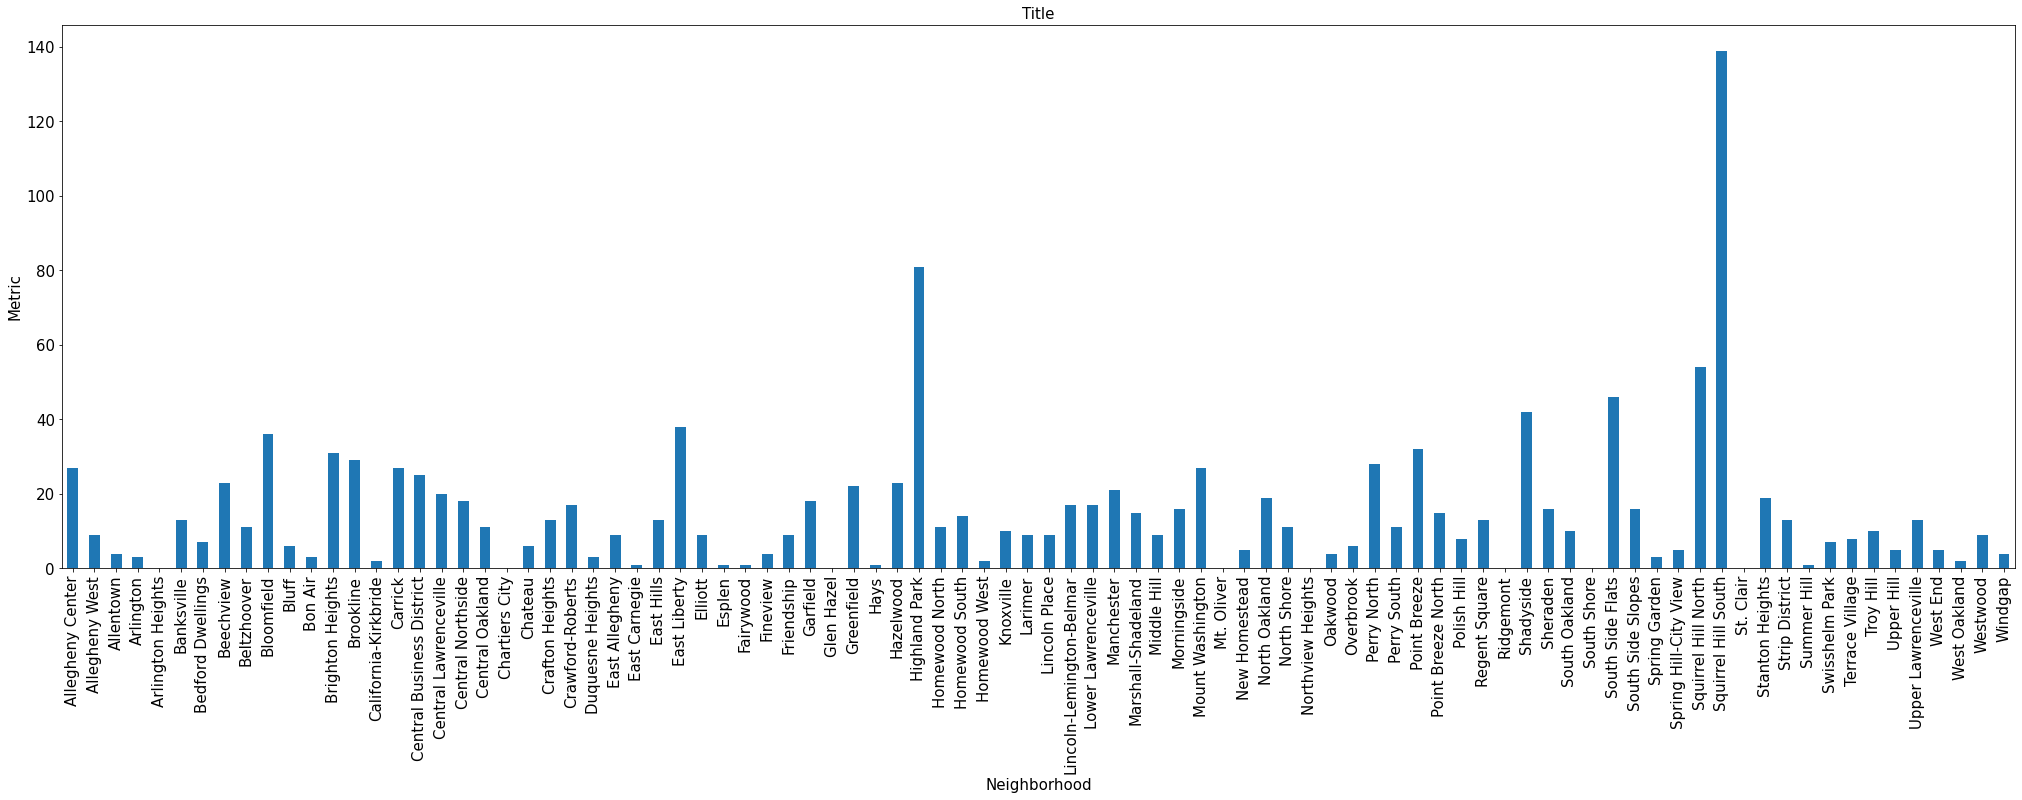

In [20]:
ax = azData.plot(kind='bar', figsize=(35,10),legend=False, fontsize=15)
ax.set_title("Title", fontsize=15)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_ylabel('Metric', fontsize = 15)

Text(0.5, 1.0, 'Point Totals')

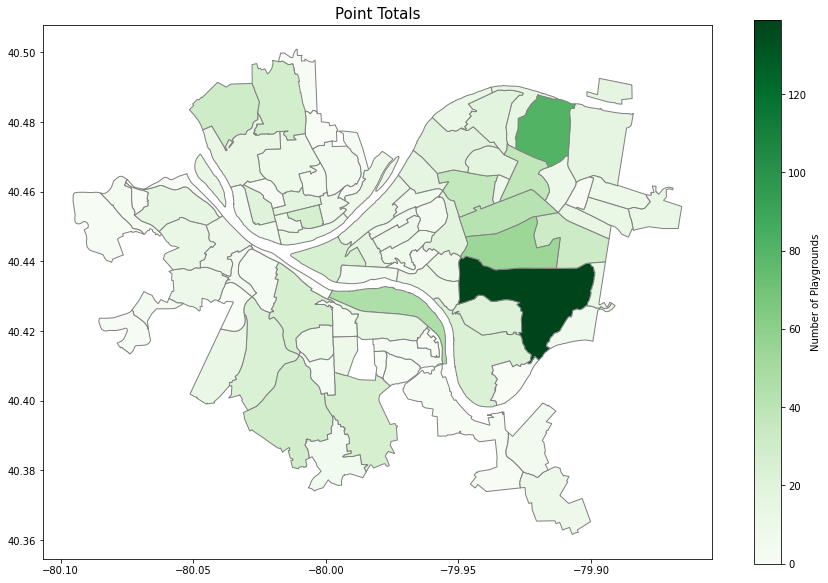

In [14]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
playground_map = neighborhoods.merge(sortedData, how="left", left_on="hood", right_on="neighborhood")
#playground_map.info()

map = playground_map.plot(column='total', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
                # set disctricts with no data to gray
                   )
map.set_title("Point Totals", fontsize = 15)

In [21]:
sortedData.head(5)

,total
neighborhood,
Squirrel Hill South,139
Highland Park,81
Squirrel Hill North,54
South Side Flats,46
Shadyside,42


### Conclusion

According to our data, we can conclude that the best neighborhood in pittsburgh is Squirrel Hill South. The top 5 neighborhoods are as follows,
1. Squirrel Hill South
2. Highland Park
3. Squirrel Hill North
4. South Side Flats
5. Shadyside

It is also important to note that this would be the best neighborhood in pittsburgh according to environmental variables, analyzing different variables would most likely result in semi-different neighborhoods aswell